## Description

- Cantidad de personas por Tipo de clase
- Cantidad de sobrevivientes
- Cantidad de Hombres y mujeres
- Cantidad de hombres y mujeres que sobrevivieron
- Distribución de edades en hombres y mujeres
- Distribución de edades de supervivientes
- Distribución de edades de Muertos
- Ver si se puede determinar cantidad de familias de personas solas
- Que significan los nombres combinados, en las filas y las asignaciones de cabinas
- Relación entre cabinas y genero
- Relación entre cabinas y sobrevivientes
- Relación entre clases géneros y sobrevivientes
- Relación entre familias y clases
- Ver si se puede encontrar información entre cabinas y clases
- Relación entre puntos de embarque, genero y clases
- Revisar la info de bote, cuerpos y origen destino si es relevante

In [2]:
# Cargamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Cargamos dataset
df = pd.read_csv('../data/Titanic_Research_v6_clean.csv', sep= ';')

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29,0.0,0,24160,S,USA
1,1,1,"Allison, Master. Hudson Trevor",1,1,1.0,2,113781,S,CANADA
2,1,0,"Allison, Miss. Helen Loraine",0,2,1.0,2,113781,S,CANADA
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30,1.0,2,113781,S,CANADA
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25,1.0,2,113781,S,CANADA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1309 non-null   int64  
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   embarked   1309 non-null   object 
 9   home.dest  1309 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 102.4+ KB


In [8]:
df.describe().round()

,pclass,survived,sex,age,sibsp,parch
count,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0
mean,2.0,0.0,1.0,30.0,0.0,0.0
std,1.0,0.0,0.0,14.0,1.0,1.0
min,1.0,0.0,0.0,1.0,0.0,0.0
25%,2.0,0.0,0.0,21.0,0.0,0.0
50%,3.0,0.0,1.0,28.0,0.0,0.0
75%,3.0,1.0,1.0,38.0,1.0,0.0
max,3.0,1.0,1.0,80.0,8.0,9.0


In [11]:
df[df['sibsp'] == 8]

,pclass,survived,name,sex,age,sibsp,parch,ticket,embarked,home.dest
1170,3,0,"Sage, Master. Thomas Henry",1,5,8.0,2,CA. 2343,S,UK
1171,3,0,"Sage, Master. William Henry",1,12,8.0,2,CA. 2343,S,UK
1172,3,0,"Sage, Miss. Ada",0,10,8.0,2,CA. 2343,S,UK
1173,3,0,"Sage, Miss. Constance Gladys",0,8,8.0,2,CA. 2343,S,UK
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",0,14,8.0,2,CA. 2343,S,UK
1175,3,0,"Sage, Miss. Stella Anna",0,20,8.0,2,CA. 2343,S,UK
1176,3,0,"Sage, Mr. Douglas Bullen",1,18,8.0,2,CA. 2343,S,UK
1177,3,0,"Sage, Mr. Frederick",1,16,8.0,2,CA. 2343,S,UK
1178,3,0,"Sage, Mr. George John Jr",1,19,8.0,2,CA. 2343,S,UK


In [13]:
df[df['name'].str.contains('sage', case= False, na= False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,embarked,home.dest
255,1,1,"Sagesser, Mlle. Emma",0,24,0.0,0,PC 17477,C,SWITZERLAND
1170,3,0,"Sage, Master. Thomas Henry",1,5,8.0,2,CA. 2343,S,UK
1171,3,0,"Sage, Master. William Henry",1,12,8.0,2,CA. 2343,S,UK
1172,3,0,"Sage, Miss. Ada",0,10,8.0,2,CA. 2343,S,UK
1173,3,0,"Sage, Miss. Constance Gladys",0,8,8.0,2,CA. 2343,S,UK
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",0,14,8.0,2,CA. 2343,S,UK
1175,3,0,"Sage, Miss. Stella Anna",0,20,8.0,2,CA. 2343,S,UK
1176,3,0,"Sage, Mr. Douglas Bullen",1,18,8.0,2,CA. 2343,S,UK
1177,3,0,"Sage, Mr. Frederick",1,16,8.0,2,CA. 2343,S,UK
1178,3,0,"Sage, Mr. George John Jr",1,19,8.0,2,CA. 2343,S,UK


In [14]:
# Cantidad de personas por Tipo de clase
df.groupby(['pclass', 'sex']).count()

survived  name  age  sibsp  parch  ticket  embarked  home.dest
pclass sex                                                                
1      0         144   144  144    144    144     144       144        144
       1         179   179  179    179    179     179       179        179
2      0         106   106  106    106    106     106       106        106
       1         171   171  171    171    171     171       171        171
3      0         216   216  216    216    216     216       216        216
       1         493   493  493    493    493     493       493        493

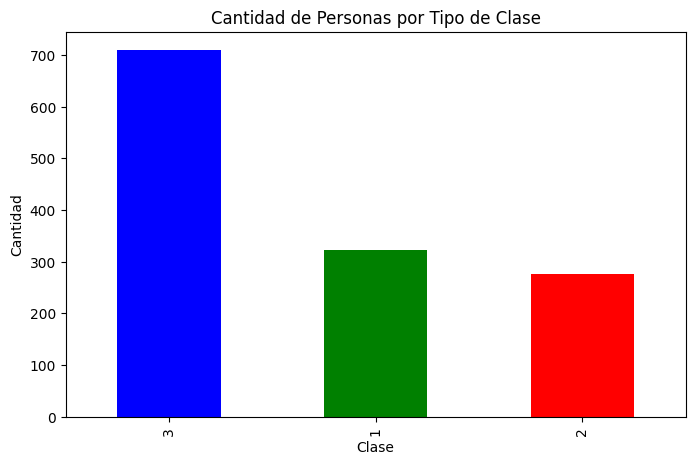

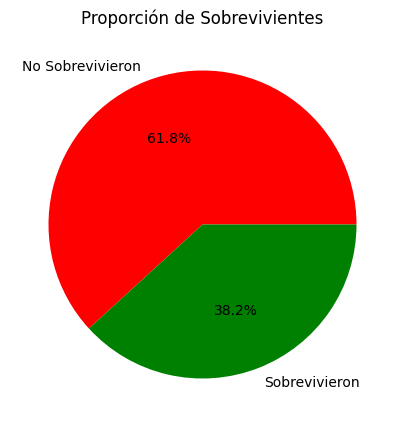

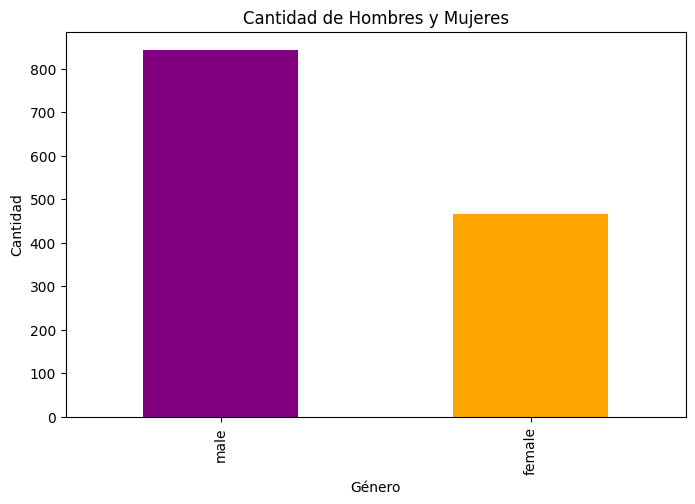

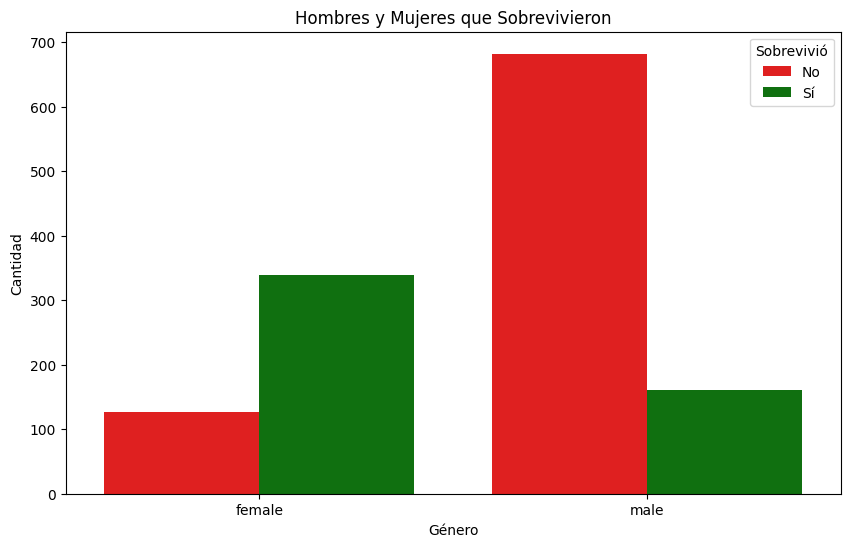

/tmp/ipykernel_28953/22846657.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='age', palette=['purple', 'orange'])


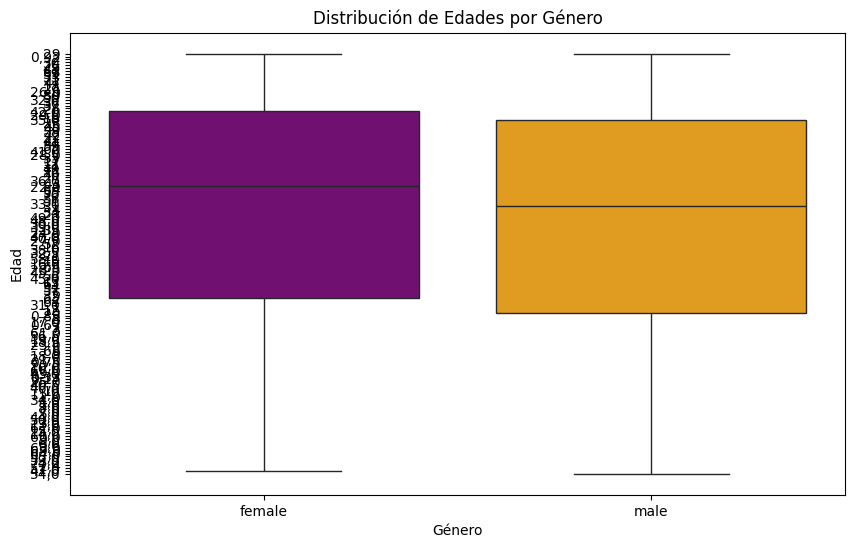

TypeError: no numeric data to plot

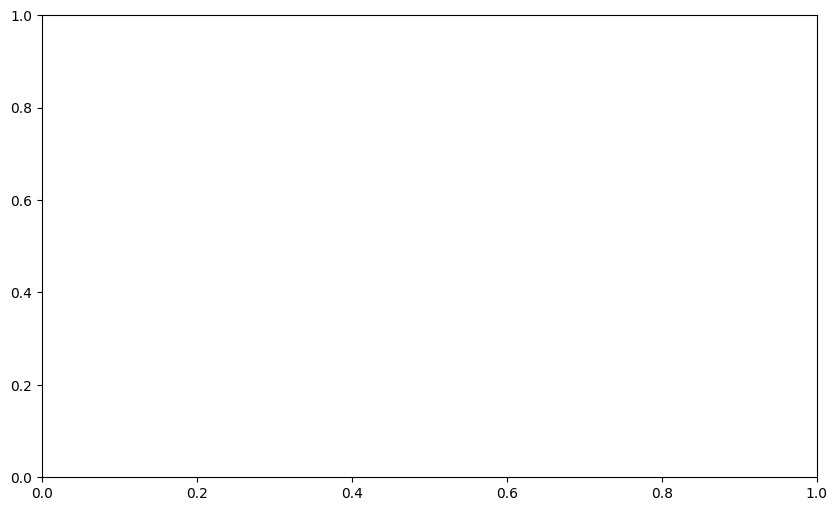

In [17]:


# Cargar el dataset
df = pd.read_csv("../data/Titanic_Research_v6.csv", sep=';')

# ================================================
# Cantidad de personas por tipo de clase
# ================================================
plt.figure(figsize=(8, 5))
df['pclass'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Cantidad de Personas por Tipo de Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

# ================================================
# Cantidad de sobrevivientes
# ================================================
plt.figure(figsize=(8, 5))
df['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No Sobrevivieron', 'Sobrevivieron'], colors=['red', 'green'])
plt.title('Proporción de Sobrevivientes')
plt.ylabel('')
plt.show()

# ================================================
# Cantidad de hombres y mujeres
# ================================================
plt.figure(figsize=(8, 5))
df['sex'].value_counts().plot(kind='bar', color=['purple', 'orange'])
plt.title('Cantidad de Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# ================================================
# Cantidad de hombres y mujeres que sobrevivieron
# ================================================
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='survived', palette=['red', 'green'])
plt.title('Hombres y Mujeres que Sobrevivieron')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

# ================================================
# Distribución de edades en hombres y mujeres
# ================================================
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='age', palette=['purple', 'orange'])
plt.title('Distribución de Edades por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

# ================================================
# Distribución de edades de supervivientes
# ================================================
plt.figure(figsize=(10, 6))
df[df['survived'] == 1]['age'].plot(kind='hist', bins=20, color='green', alpha=0.7)
plt.title('Distribución de Edades de Supervivientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# ================================================
# Distribución de edades de muertos
# ================================================
plt.figure(figsize=(10, 6))
df[df['survived'] == 0]['age'].plot(kind='hist', bins=20, color='red', alpha=0.7)
plt.title('Distribución de Edades de No Supervivientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# ================================================
# Cantidad de familias y personas solas
# ================================================
df['family_size'] = df['sibsp'] + df['parch']
df['family_type'] = df['family_size'].apply(lambda x: 'Alone' if x == 0 else 'With Family')
plt.figure(figsize=(8, 5))
df['family_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Solas', 'Con Familia'], colors=['blue', 'orange'])
plt.title('Proporción de Personas Solas vs Con Familia')
plt.ylabel('')
plt.show()

# ================================================
# Análisis de títulos en nombres
# ================================================
df['title'] = df['name'].str.extract(r',\s*([^\.]+)\.')
plt.figure(figsize=(12, 6))
df['title'].value_counts().plot(kind='bar', color='teal')
plt.title('Distribución de Títulos en los Nombres')
plt.xlabel('Título')
plt.ylabel('Frecuencia')
plt.show()

# ================================================
# Relación entre cabinas y género
# ================================================
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ticket', hue='sex', palette='Set2', order=df['ticket'].value_counts().index[:10])
plt.title('Relación entre Cabinas y Género (Top 10 Cabinas)')
plt.xlabel('Cabina')
plt.ylabel('Cantidad')
plt.show()

# ================================================
# Relación entre clases, géneros y sobrevivientes
# ================================================
plt.figure(figsize=(12, 6))
sns.catplot(data=df, x='pclass', hue='sex', col='survived', kind='count', palette='pastel', height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Relación entre Clases, Género y Supervivencia')
plt.show()

# ================================================
# Relación entre puntos de embarque, género y clases
# ================================================
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab([df['embarked'], df['sex']], df['pclass']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Puntos de Embarque, Género y Clases')
plt.xlabel('Clase')
plt.ylabel('Punto de Embarque / Género')
plt.show()
